In [1]:
import queue
import numpy as np
import pandas as pd
import networkx as nx
import pydot
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/andrei_c/projects/ds_env/from-scratch/src')

from Ginasty import *
from Fangorn import *

In [2]:
original_sample = pd.read_csv('../data/clf-data.csv').to_numpy()

In [3]:
random_samples = np.random.choice(original_sample.shape[0], 100, replace=False)

train_sample = original_sample[random_samples, :]
test_sample  = np.delete(original_sample, random_samples, 0)

In [15]:
columns_index = range(original_sample.shape[1] - 1)
columns_dtype = [type(original_sample[0, i]) for i in columns_index]

y_classes_ = np.unique(original_sample[:, -1])

# select how many columns of X will be used by the tree:
remaining_cols_ = get_col_sample(original_sample, .8)
remaining_cols_

array([2])

## tree model:

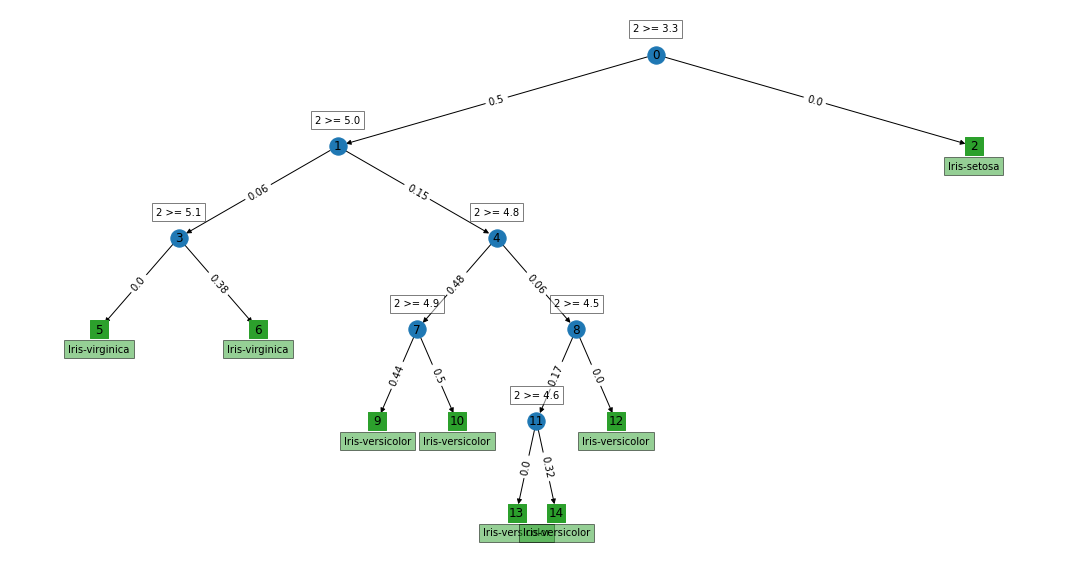

In [16]:
tree_   = make_tree(train_sample, y_classes_, remaining_cols_, False)
g_tree  = make_tree_as_graph(tree_)

## predicitons:

In [17]:
yhat = make_prediciton(tree_, test_sample)[:, 0]

results = pd.DataFrame({'y': test_sample[:, -1], 'yhat': yhat})
results['check'] = results.apply(lambda x: 1 if x[0] == x[1] else 0, axis=1)

results['check'].value_counts()

1    45
0     5
Name: check, dtype: int64

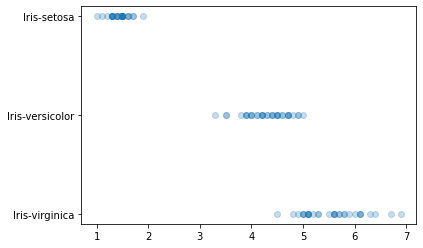

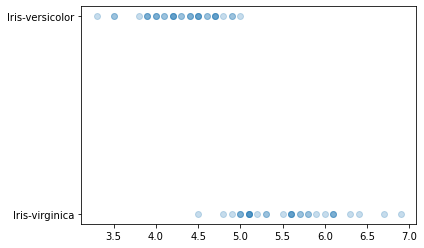

In [18]:
plt.scatter(train_sample[:, 2], train_sample[:, -1], alpha=.25)
plt.show();

_ = train_sample[train_sample[:, 2] >= 3]
plt.scatter(_[:, 2], _[:, -1], alpha=.25)
plt.show();